In [1]:
################################
# DO NOT EDIT THE FOLLOWING CODE
################################
import numpy as np
from matplotlib import pyplot as plt

from Environment import Environment

from MyEpsilonGreedy import MyEpsilonGreedy
from MyUCB import MyUCB
from MyThompsonSampling import MyThompsonSampling

num_arms = 8 # Number of arms for each bandit
num_rounds = 500 # Variable 'T' in the writeup
num_repeats = 10 # Variable 'repetitions' in the writeup

# Gaussian environment parameters
means = [7.2, 20.8, 30.4, 10.3, 40.7, 50.1, 1.5, 45.3]
variances = [0.01, 0.02, 0.03, 0.02, 0.04, 0.001, 0.0007, 0.06]

if len(means) != len(variances):
    raise ValueError('Number of means and variances must be the same.')
if len(means) != num_arms or len(variances) != num_arms:
    raise ValueError('Number of means and variances must be equal to the number of arms.')

# Bernoulli environment parameters
p = [0.45, 0.13, 0.71, 0.63, 0.11, 0.06, 0.84, 0.43]

if len(p) != num_arms:
    raise ValueError('Number of Bernoulli probabily values p must be equal to the number of arms.')

# Epsilon-greedy parameter
epsilon = 0.1

if epsilon < 0:
    raise ValueError('Epsilon must be >= 0.')

gaussian_env_params = {'means':means, 'variances':variances}
bernoulli_env_params = {'p':p}

# Use these two objects to simulate the Gaussian and Bernoulli environments.
# In particular, you need to call get_reward() and pass in the arm pulled to receive a reward from the environment.
# Use the other functions to compute the regret.
# See Environment.py for more details. 
gaussian_env = Environment(name='Gaussian', env_params=gaussian_env_params)
bernoulli_env = Environment(name='Bernoulli', env_params=bernoulli_env_params)

#####################
# ADD YOUR CODE BELOW
#####################


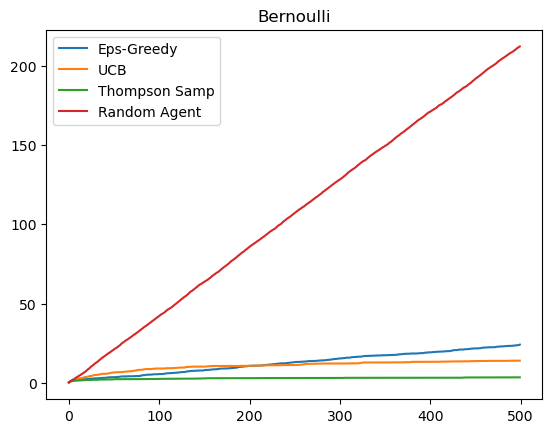

In [2]:
import matplotlib.pyplot as plt

class RandomAgent:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.values = np.zeros(num_arms)
        self.counts = np.zeros(num_arms)

    def pull_arm(self):
        arm = np.random.choice(num_arms)
        self.counts[arm] += 1
        self.arm = arm
        return self.arm

    def update_model(self, reward):
        self.values[self.arm] = (self.values[self.arm]*self.counts[self.arm] + reward) / (self.counts[self.arm]+1)
        self.counts[self.arm] += 1

eps_greedy_gau = MyEpsilonGreedy(num_arms=num_arms, epsilon=epsilon)
eps_greedy_ber = MyEpsilonGreedy(num_arms=num_arms, epsilon=epsilon)

ucb_gau = MyUCB(num_arms=num_arms)
ucb_ber = MyUCB(num_arms=num_arms)

ts_gau = MyThompsonSampling(num_arms=num_arms)
ts_ber = MyThompsonSampling(num_arms=num_arms)

rand_gau = RandomAgent(num_arms=num_arms)
rand_ber = RandomAgent(num_arms=num_arms)

def cumu_regret(env, alg, num_rounds, num_repeats):
    cumu_regret_list = []
    cumu_regret = 0
    for i in range(num_rounds):
        arms = []
        rewards = []
        for j in range(num_repeats):
            arm = alg.pull_arm()
            arms.append(arm)
            reward = env.get_reward(arm)
            rewards.append(reward)
            if env == gaussian_env and alg == ts_gau:
                ts_reward = reward/env.get_opt_reward()
                ts_reward = np.round(ts_reward, 1)
                alg.update_model(reward=ts_reward)
            else:
                alg.update_model(reward=reward)
        opt_arm = env.get_opt_arm()
        opt_mean_reward = env.get_mean_reward(opt_arm)
        mean_rewards_t = [env.get_mean_reward(x) for x in arms]
        cumu_regret += np.mean([opt_mean_reward - y for y in mean_rewards_t])
        cumu_regret_list.append(cumu_regret)
    
    return cumu_regret_list


def ploter(eps, ucb, ts, rand, title):
    fig, ax = plt.subplots()
    ax.plot(eps, label = "Eps-Greedy")
    ax.plot(ucb, label = "UCB")
    ax.plot(ts, label = "Thompson Samp")
    ax.plot(rand, label = "Random Agent")
    #ax.set_ylim([0, 50])
    plt.legend(loc = "upper left")
    plt.title(title)
    plt.savefig('hw5_2_' + title)



# epsilon greedy
# gaussian
eps_regret_list_gau = cumu_regret(env=gaussian_env, alg=eps_greedy_gau, num_rounds=num_rounds, 
                              num_repeats=num_repeats)
# bernoulli
eps_regret_list_ber = cumu_regret(env=bernoulli_env, alg=eps_greedy_ber, num_rounds=num_rounds, 
                                  num_repeats=num_repeats)

# UCB
# gaussian
ucb_regret_list_gau = cumu_regret(env=gaussian_env, alg=ucb_gau, num_rounds=num_rounds, 
                                  num_repeats=num_repeats)
# bernoulli
ucb_regret_list_ber = cumu_regret(env=bernoulli_env, alg=ucb_ber, num_rounds=num_rounds, 
                                  num_repeats=num_repeats)

# Thompson Sampling
ts_regret_list_gau = cumu_regret(env=gaussian_env, alg=ts_gau, num_rounds=num_rounds, 
                                 num_repeats=num_repeats)
ts_regret_list_ber = cumu_regret(env=bernoulli_env, alg=ts_ber, num_rounds=num_rounds, 
                                 num_repeats=num_repeats)

# Random Agent
rand_regret_list_gau = cumu_regret(env=gaussian_env, alg=rand_gau, num_rounds=num_rounds,
                                   num_repeats=num_repeats)
rand_regret_list_ber = cumu_regret(env=bernoulli_env, alg=rand_ber, num_rounds=num_rounds, 
                                   num_repeats=num_repeats)

# Plots
ploter(eps=eps_regret_list_ber, ucb=ucb_regret_list_ber, ts=ts_regret_list_ber, 
       rand = rand_regret_list_ber, title='Bernoulli')


In [4]:
ucb_test = MyUCB(num_arms=num_arms)

In [5]:
def cumu_regret_ucb(env, alg, num_rounds, num_repeats):
    cumu_regret_list = []
    cumu_regret = 0
    for i in range(num_rounds):
        arms = []
        rewards = []
        for j in range(num_repeats):
            arm = alg.pull_arm()
            arms.append(arm)
            reward = env.get_reward(arm)
            rewards.append(reward)
            alg.update_model(reward=reward)
        opt_arm = env.get_opt_arm()
        opt_mean_reward = env.get_mean_reward(opt_arm)
        mean_rewards_t = [env.get_mean_reward(x) for x in arms]
        cumu_regret += np.mean([opt_mean_reward - y for y in mean_rewards_t])
        cumu_regret_list.append(cumu_regret)
    
    return cumu_regret_list, arms

In [7]:
cumu_regret_ucb(env=gaussian_env, alg=ucb_test, num_rounds=1, num_repeats=10)

([19.45], [0, 1, 2, 3, 4, 5, 6, 7, 5, 5])

In [9]:
[gaussian_env.get_reward(k) for k in np.arange(0, 7)]

[7.189453360848867,
 20.826791772471346,
 30.398697271765617,
 10.325886643491355,
 40.75807766456036,
 50.10068354297978,
 1.4989858823564532]

In [10]:
np.random.random()

0.42173533210652603

In [4]:
a = 0.4
tyep = np.where(a>=0.5, 1, 0)

In [14]:
a = np.argmax(t)

In [4]:
[gaussian_env.get_reward(k) for k in np.arange(0, 7)][gaussian_env.get_reward(k) for k in np.arange(0, 7)]/np.max()

array([0.14378031, 0.41490113, 0.60662256, 0.20556992, 0.81284946,
       1.00001602, 0.02994131])

In [10]:
[bernoulli_env.get_reward(k) for k in np.arange(0, 7)]

[1, 0, 0, 1, 0, 0, 1]

In [16]:
[gaussian_env.get_reward(k) for k in np.arange(0, 7)]

[7.19046334297969,
 20.803493083837306,
 30.419201701304402,
 10.286195552328032,
 40.754625656378074,
 50.0990943377141,
 1.4987582532799812]

In [21]:
bernoulli_env.get_reward(7)

0

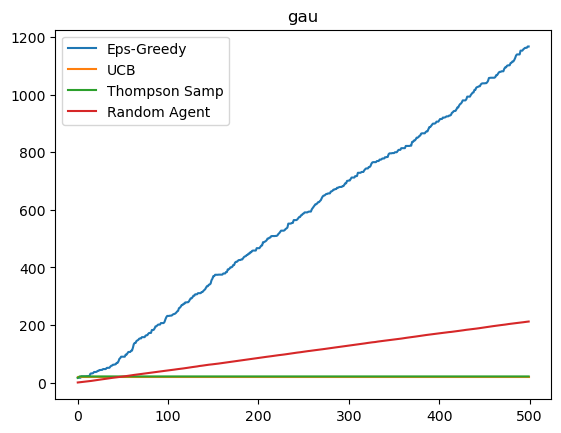

In [3]:
ploter(eps=eps_regret_list_gau, ucb=ucb_regret_list_gau, ts=ts_regret_list_gau, 
       rand = rand_regret_list_ber, title='gau')

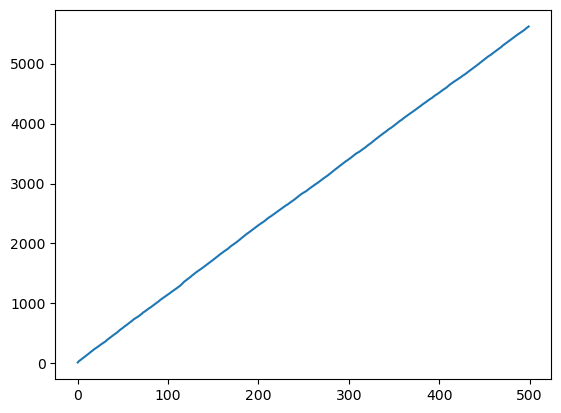

In [4]:
plt.plot(ts_regret_list_gau)
plt.show()